#### Predictive Modeling 

### In this analysis, we utilize a multivariate linear regression model to predict house prices based on various features such as lot size, number of bedrooms, number of bathrooms, stories, and additional amenities. The goal of this model is to understand how these factors collectively influence property values, allowing us to identify key characteristics that drive housing prices. 
### By examining the relationships between these features and the price, we aim to create an accurate model for understanding property values in the housing market.


In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Load Dataset
data=pd.read_csv('HousingNew.csv')
data.head()

,ID,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom,fullbase,airco
0,1,42000.0,5850,3,1,2,1,no,yes,no
1,2,38500.0,4000,2,1,1,0,no,no,no
2,3,49500.0,3060,3,1,1,0,no,no,no
3,4,60500.0,6650,3,1,2,0,yes,no,no
4,5,61000.0,6360,2,1,1,0,no,no,no


In [5]:
# Convert 'yes'/'no' to 1/0 for binary columns
data['recroom'] = data['recroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['fullbase'] = data['fullbase'].apply(lambda x: 1 if x == 'yes' else 0)
data['airco'] = data['airco'].apply(lambda x: 1 if x == 'yes' else 0)
data.head()

,ID,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom,fullbase,airco
0,1,42000.0,5850,3,1,2,1,0,0,0
1,2,38500.0,4000,2,1,1,0,0,0,0
2,3,49500.0,3060,3,1,1,0,0,0,0
3,4,60500.0,6650,3,1,2,0,0,0,0
4,5,61000.0,6360,2,1,1,0,0,0,0


In [6]:
# Remove 'ID' column
housing_data=data.drop('ID',axis=1)
#Show Key Statistics
housing_data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl,recroom,fullbase,airco
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.0,546.0,546.0
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308,0.0,0.0,0.0
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307,0.0,0.0,0.0
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000,0.0,0.0,0.0
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.0,0.0,0.0
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000,0.0,0.0,0.0


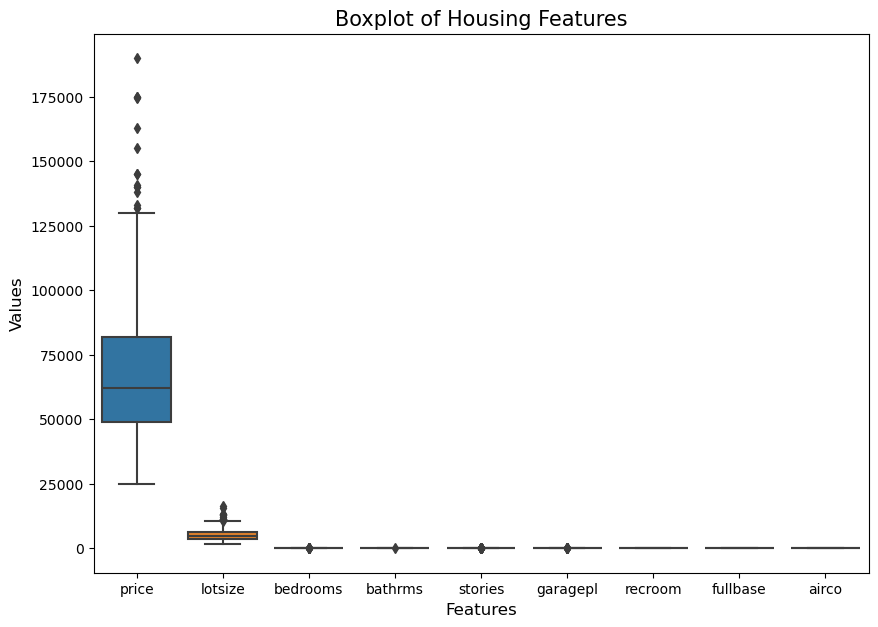

In [7]:
# Boxplot
plt.figure(figsize=(10,7))
sns.boxplot(data=housing_data)

# Adding labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Boxplot of Housing Features', fontsize=15)

# Show plot
plt.show()

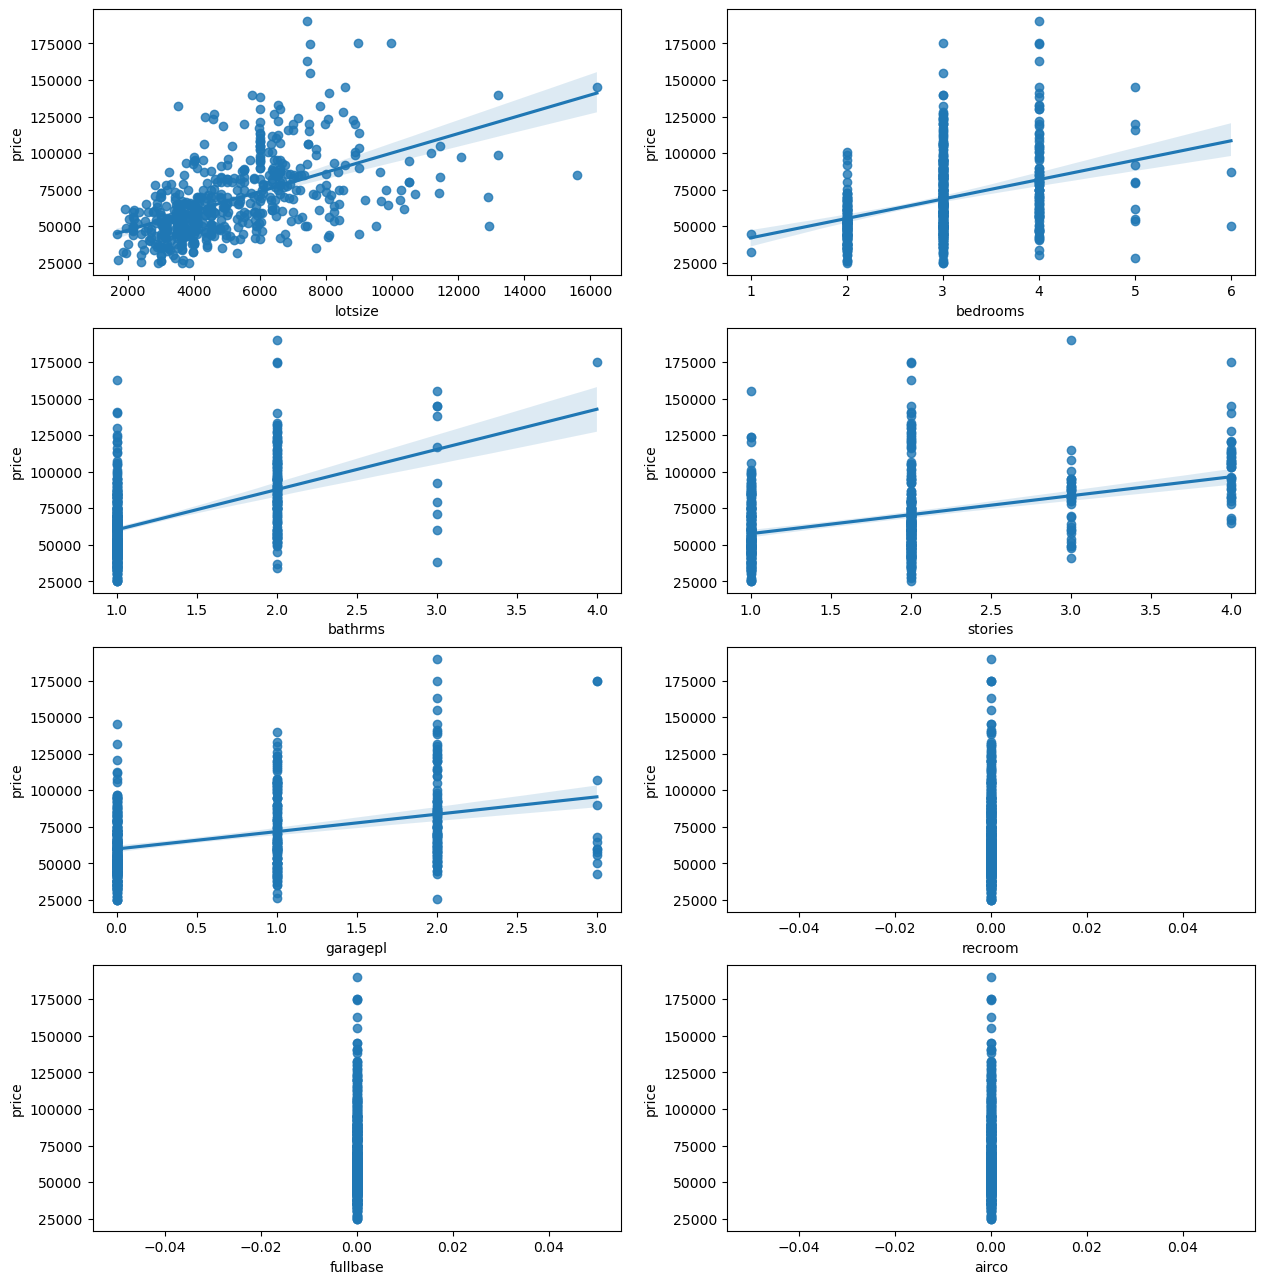

In [8]:
# Regression plots for each feature against price
plt.figure(figsize=(15, 20))

cnt = 1
for col in housing_data.columns:
    if col == 'price':
        continue
    plt.subplot(5, 2, cnt)
    sns.regplot(x=housing_data[col], y=housing_data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    cnt += 1


In [9]:
# Define x (independent variables) and y (dependent variable)
x = housing_data.drop('price', axis=1).to_numpy()
y = housing_data['price'].to_numpy()

# Create train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
# Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  


# Loop for LR model
for name, method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train_scaled, y_train)  # Fit the model
    predict = method.predict(x_test_scaled)  # Predict using the model

    # Output the method name
    print('Method: {}'.format(name))   

    # Print Intercept and Coefficients
    print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
    coeff_table = pd.DataFrame(np.transpose(method.coef_), housing_data.drop('price', axis=1).columns, columns=['Coefficients'])
    print('\n')
    print(coeff_table)
    
    # Evaluate the model using metrics
    r2_score = metrics.r2_score(y_test, predict)
    adjusted_r_squared2 = 1 - (1 - r2_score) * (len(y) - 1) / (len(y) - x.shape[1] - 1)

    print('\nR2: {:0.2f}'.format(r2_score))
    print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

    # Print Error Metrics
    print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
    print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
    print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))  


Method: Linear Regression

Intercept: 68860.08


          Coefficients
lotsize    9803.997651
bedrooms   2270.959106
bathrms    8510.170781
stories    6817.991980
garagepl   4953.332018
recroom       0.000000
fullbase      0.000000
airco         0.000000

R2: 0.45
Adj_R2: 0.44

Mean Absolute Error: 13644.96
Mean Squared Error: 302804397.42
Root Mean Squared Error: 17401.28


In [11]:
# Forecast Table
predict2 = predict.T  # Transpose the predicted values
diff = predict2 - y_test  # Calculate the difference between actual and predicted values
FcstTble = pd.DataFrame({'Actual': y_test, 'Predicted': predict2.round(1), 'Difference': diff.round(1)})  # Create the forecast table

# Display the forecast table
print('\nForecast Table')
print(FcstTble.head())



Forecast Table
    Actual  Predicted  Difference
0  38000.0    88059.7     50059.7
1  75000.0   114489.6     39489.6
2  60000.0    50511.7     -9488.3
3  52500.0    43260.3     -9239.7
4  42000.0    59674.8     17674.8
